This notebook shows a bit of Section 2 of the paper. 

Importantly, this notebook has a few dependencies: 
- The full TNO catalog (including the flux chains) from https://github.com/bernardinelli/des_tno_catalog. A new version of the catalog, that includes the free inclinations from [Huang et al (2022)](doi.org/10.3847/1538-4365/ac559a) is included
- The `gmm_anyk` package from https://github.com/bernardinelli/gmm_anyk

Paths assume this repository and the `des_tno_catalog` repository are on the same directory.

In [6]:
tno = tb.Table.read('../../des_full_catalog/y6_des_tnos_color.fits')
tno

MPC,a,sigma_a,e,sigma_e,i,sigma_i,aop,sigma_aop,lan,sigma_lan,T_p,sigma_T,q,sigma_q,d,sigma_d,delta,sigma_delta,m_r,sigma_m_r,NUNIQUE,NDETECT,CHI2,x,y,z,vx,vy,vz,Sigma_x_x,Sigma_x_y,Sigma_x_z,Sigma_x_vx,Sigma_x_vy,Sigma_x_vz,Sigma_y_y,Sigma_y_z,Sigma_y_vx,Sigma_y_vy,Sigma_y_vz,Sigma_z_z,Sigma_z_vx,Sigma_z_vy,Sigma_z_vz,Sigma_vx_vx,Sigma_vx_vy,Sigma_vx_vz,Sigma_vy_vy,Sigma_vy_vz,Sigma_vz_vz,Class,Notes,H_g,sig_g,H_r,sig_r,H_i,sig_i,H_z,sig_z,g-r,r-i,r-z,cov,amp
bytes12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes24,bytes14,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,"float64[3,3]",float64[3]
1997 RT5,41.30493934,0.00193741,0.02570883,4.397e-05,12.7336892,0.00010052,18.62136958,0.27656068,163.75249874,0.0002,104395.31292273,80.60194276,40.243037707640035,0.0003840579075426996,42.42337978,0.00052528,42.36243329,0.0005131,23.43453625,0.06511927,11,14,24.92336,41.886293924,6.173221055,-1.4161488491,-0.1320766857,0.924752488,0.1914001302,2.6914772545452064e-07,4.1794072409403694e-08,-9.77327387718305e-09,4.090171865318033e-08,1.20019461215846e-08,-4.5368500111692303e-10,6.610523655856721e-09,-1.4983359911071307e-09,7.295717622731743e-09,2.005774535184629e-09,-1.0573094817057913e-10,3.7398487625926005e-10,-1.3107803215434558e-09,-4.0947389072398135e-10,9.398520827929059e-12,1.4717766567232193e-08,3.1073471706237703e-09,-3.86640541322822e-10,7.31948399157148e-10,-6.820354380854278e-11,1.5589103418241052e-11,Classical,--,7.691142813323536,0.10747087054386814,7.041844097858489,0.0755849279614205,6.7114883641448895,0.06947907555575722,6.721296183006482,0.1113155638799088,0.6492987154650472,0.33035573371360183,0.32054791485201,0.016587470986835613 .. 0.017057891722802178,0.034415434346831454 .. 0.182697269231554
1999 RB216,47.54693131,0.00102254,0.29236585,1.278e-05,12.68793084,5.036e-05,208.67885604,0.00770772,175.72386303,0.00013499,56776.39067755,1.34016249,33.645832429571826,0.0013304629165758744,33.38326075,0.00010554,33.66016217,8.53e-05,22.41803573,0.02364225,18,30,29.91334,29.7100105434,15.625777331,2.4813048017,-0.5635070399,1.0742552597,0.2140398547,8.666936322466563e-09,4.580950872673932e-09,7.012413693476835e-10,-3.735756918505895e-10,2.2503048919251674e-10,5.0117576587005614e-11,2.426790398839157e-09,3.7113715945010655e-10,-1.562348979158427e-10,1.3990862351469483e-10,2.945155169210452e-11,5.993660340614423e-11,-2.1236682207012314e-11,2.2470320260784054e-11,6.024985714223725e-12,1.149519861591511e-09,5.185477314427252e-10,7.725620542109935e-11,2.540229302567915e-10,3.839322150395631e-11,7.440391596909825e-12,Resonant 2:1,--,7.885743005295664,0.0464798083272893,7.084024978221171,0.03191642022415265,6.7667709362291735,0.033188260806347146,6.652716124349299,0.04755483996126325,0.8017180270744917,0.31725404199199775,0.4313088538718727,0.0021863771876798935 .. 0.0032653100693858027,0.04654885770122625 .. 0.11001382172575343
1999 RG215,46.39353702,0.00407033,0.07109221,0.00017478,0.24203434,0.0001111,114.15700339,0.11789296,292.38916861,0.05999675,71219.18380948,26.01129649,43.09531807268823,0.01117115465670002,44.28522997,0.0006896,44.10663725,0.00068817,23.75095743,0.09119263,8,9,20.08863,44.0619949874,-1.8808191669,-0.6313214634,-0.00628987,0.8890967165,0.3871442706,4.745329800060349e-07,-2.778330161928806e-08,-1.0031127559460105e-08,-3.765397944979831e-08,1.369348082397816e-08,5.800840172107498e-09,1.9610475049475277e-09,6.998546703049812e-10,5.12662179915259e-09,-9.858973647049813e-10,-3.9665840191599515e-10,3.367330696758132e-10,2.0697901776456237e-09,-3.594382198663003e-10,-1.7088487200923876e-10,3.608769606926016e-08,-2.9027964296

In [ ]:
solar_m = {'g' : -26.52, 'r' : -26.96, 'i' : -27.05, 'z' : -27.07, 'Y' : -27.07} #from Wilmer (2018)
band_l  = {'g': 4766.0,  'r' : 6406.1, 'i' : 7794.9, 'z' : 9174.4, 'Y' : 9874.5} # from DES DR2 and/or FGCM paper
def reddening(color_anorm, band_a, band_b, band_norm):
    solar_a = solar_m[band_a] - solar_m[band_norm]
    solar_b = solar_m[band_b] - solar_m[band_norm]
    
    dlambda_a = band_l[band_a] - band_l[band_norm]
    dlambda_b = band_l[band_b] - band_l[band_norm]
    redd_a = ( np.power(10, -0.4 * (color_anorm - solar_a)) - 1 ) * dlambda_b / dlambda_a
    return solar_b - 2.5 * np.log10(redd_a + 1)
gr = np.linspace(-0.5,2.5,200)
ri = - reddening(gr, 'g', 'i', 'r')
rz = - reddening(gr, 'g', 'z', 'r')



/tmp/ipykernel_2277390/2106455549.py:10: RuntimeWarning: invalid value encountered in log10
  return solar_b - 2.5 * np.log10(redd_a + 1)


Color-color-color diagram

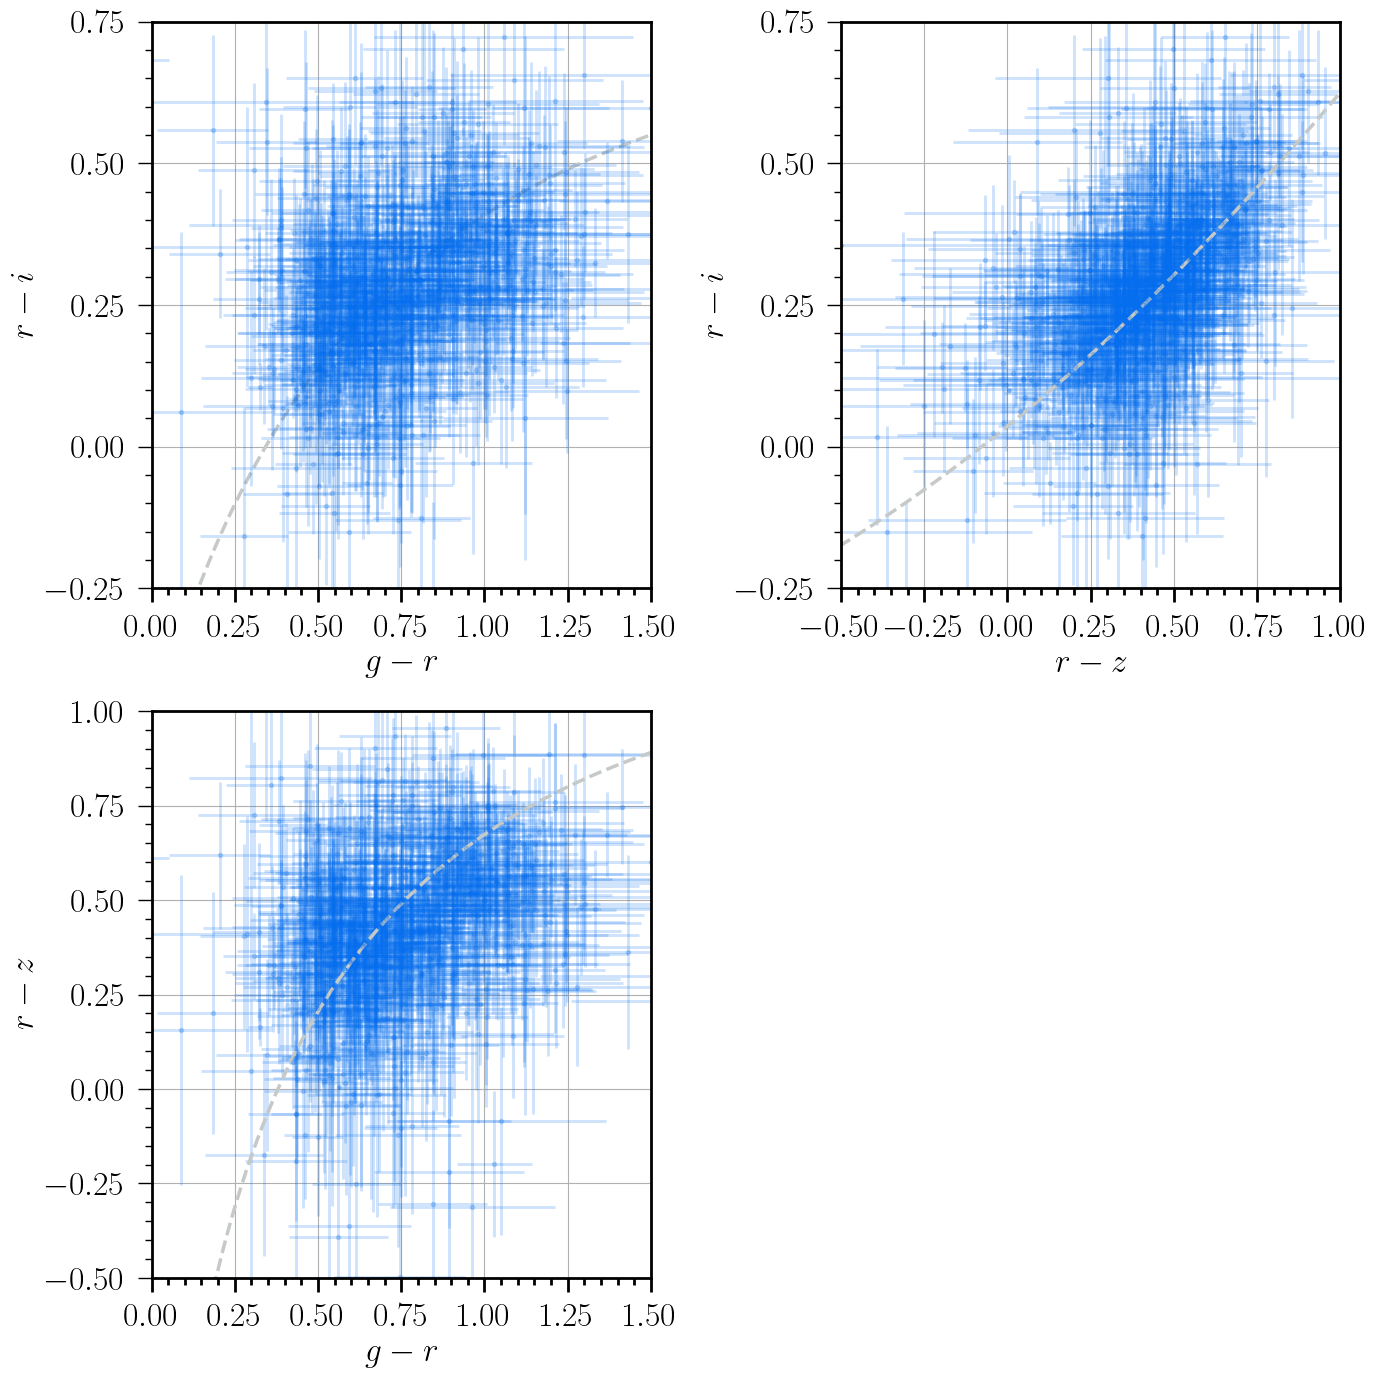

In [7]:
fig,ax = pl.subplots(2,2, )


#ax[0,0].get_shared_y_axes().join(ax[0,0], ax[1,0])
#ax[1,0].get_shared_x_axes().join(ax[1,0], ax[0,0])




ax[0,0].plot(gr,ri, '--', alpha=1, color='xkcd:silver', lw=2.5 )
ax[0,0].errorbar(tno['g-r'], tno['r-i'], xerr=np.sqrt(tno['cov'][:,0,0]), yerr=np.sqrt(tno['cov'][:,1,1]), fmt='.', alpha=0.2)
ax[0,1].errorbar(tno['r-z'], tno['r-i'], xerr=np.sqrt(tno['cov'][:,2,2]), yerr=np.sqrt(tno['cov'][:,1,1]), fmt='.', alpha=0.2)
ax[1,0].errorbar(tno['g-r'], tno['r-z'], xerr=np.sqrt(tno['cov'][:,0,0]), yerr=np.sqrt(tno['cov'][:,2,2]), fmt='.', alpha=0.2)



ax[0,1].plot(rz,ri, '--', alpha=1, color='xkcd:silver',lw=2.5)
ax[1,1].axis('off')
ax[1,0].plot(gr,rz, '--', alpha=1, color='xkcd:silver',lw=2.5)



ax[0,1].set_ylabel(r'$r-i$')
ax[0,1].set_xlabel(r'$r-z$',)# fontsize=16)
ax[1,0].set_xlabel(r'$g-r$',)# fontsize=16)
ax[1,0].set_ylabel(r'$r-z$',)# fontsize=16)

ax[0,0].set_ylabel(r'$r-i$',)# fontsize=16)
ax[0,0].set_xlabel(r'$g-r$',)# fontsize=16)
ax[0,0].set_xlim(0, 1.5)
ax[0,0].set_ylim(-0.25,0.75)
ax[0,0].grid()
ax[1,0].set_ylim(-0.5, 1)
ax[1,0].set_xlim(0, 1.5)


ax[1,0].grid()
ax[0,1].set_ylim(-0.25,0.75)
ax[0,1].set_xlim(-0.5,1)

ax[0,1].grid()
pl.tight_layout()



ax[1,0].set_yticks([-0.5, -0.25, 0, 0.25, 0.5, 0.75,1])
ax[0,1].set_xticks([0, 0.25, 0.5, 0.75,1])
ax[0,0].set_xticks([0, 0.25, 0.5, 0.75,1,1.25, 1.5])
ax[0,0].set_yticks([-0.25, 0, 0.25, 0.5, 0.75, ])
ax[1,0].set_xticks([0, 0.25, 0.5, 0.75,1,1.25, 1.5])

ax[0,1].set_xticks([-0.5, -0.25, 0, 0.25, 0.5, 0.75,1])
ax[0,1].set_yticks([-0.25, 0, 0.25, 0.5, 0.75, ])




#ax[1,0].set_xlim(0.2, 1.3)


fig.set_size_inches(14,14)
pl.tight_layout()


pl.show()




In [ ]:
import gmm_anyk as ga 

gmm = ga.GMMNoise.read('/Users/pedro/Dropbox/DES/Science/Notebooks/2comp_outliers.pkl.gz')

In [ ]:
# NIRB component is the 0 index in the gmm object, NIRF is 1 
print(gmm.sampleComponent(1,0)) #sampling 1 nirb
print(gmm.sampleComponent(1,1)) #sampling 1 nirf


[[0.67709314 0.26489475 0.40212232]]
[[1.00914506 0.40837604 0.63572796]]


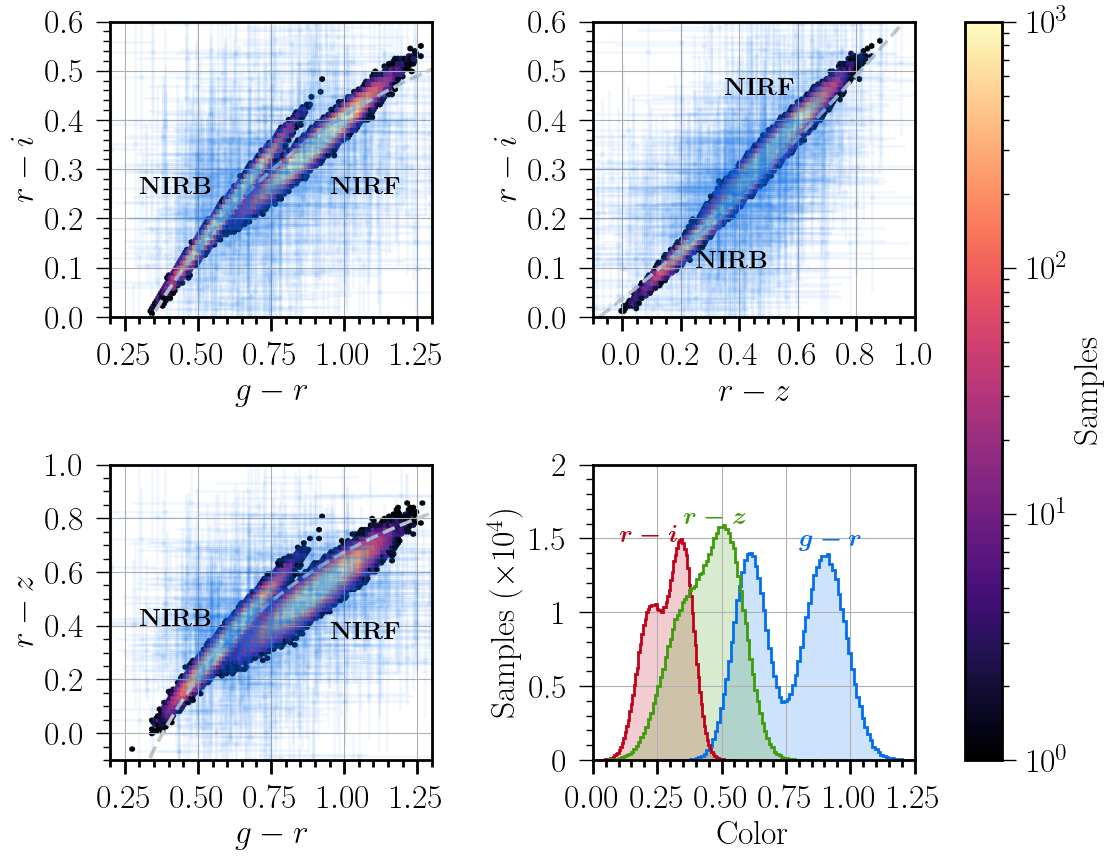

In [13]:
s = gmm.sample(500000) #this samples from the full GMM, following the ratios f from the best-fit 
fig,ax = pl.subplots(2,2)


#ax[0,0].get_shared_y_axes().join(ax[0,0], ax[1,0])
#ax[1,0].get_shared_x_axes().join(ax[1,0], ax[0,0])




im = ax[0,0].hexbin(s[:,0], s[:,1], bins='log', cmap='magma',mincnt=1, alpha=1, vmax=1e3)

ax[0,0].plot(gr,ri, '--', alpha=1, color='xkcd:silver', lw=2.5 )


ax[0,1].hexbin(s[:,2], s[:,1], bins='log', cmap='magma', mincnt=1, vmax=1e3)
ax[0,1].plot(rz,ri, '--', alpha=1, color='xkcd:silver',lw=2.5)
#ax[1,1].axis('off')

ax[1,0].hexbin(s[:,0], s[:,2], bins='log', cmap='magma',mincnt=1, vmax=1e3)
ax[1,0].plot(gr,rz, '--', alpha=1, color='xkcd:silver',lw=2.5)



ax[0,1].set_ylabel(r'$r-i$')
ax[0,1].set_xlabel(r'$r-z$')
ax[1,0].set_xlabel(r'$g-r$')
ax[1,0].set_ylabel(r'$r-z$')

ax[0,0].set_ylabel(r'$r-i$')
ax[0,0].set_xlabel(r'$g-r$')
ax[0,0].set_xlim(0.2, 1.3)
ax[0,0].set_ylim(0,0.6)
ax[0,0].grid()
ax[1,0].set_ylim(-0.1, 1)
ax[1,0].grid()
ax[0,1].set_ylim(0,0.6)
ax[0,1].set_xlim(-0.1,1)

ax[0,1].grid()
pl.tight_layout()


ax[1,1].hist(s[:,0], bins=100, histtype='step', color='xkcd:cerulean blue')
ax[1,1].hist(s[:,0], bins=100, color='xkcd:cerulean blue', alpha=0.2)

ax[1,1].hist(s[:,1], bins=100, histtype='step', color='xkcd:scarlet')
ax[1,1].hist(s[:,1], bins=100, alpha=0.2, color='xkcd:scarlet')

ax[1,1].hist(s[:,2], bins=100, histtype='step', color='xkcd:grass green')
ax[1,1].hist(s[:,2], bins=100, alpha=0.2, color='xkcd:grass green')

ax[1,1].set_xlabel('Color')
ax[1,1].set_ylabel(r'Samples $(\times 10^4)$')
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax[1,1].set_xticks([0,0.25, 0.5, 0.75, 1, 1.25])
ax[1,1].set_xlim(0,1.25)
ax[1,1].grid()
ax[1,1].set_yticks([0,5000,10000,15000,20000], [0, 0.5, 1, 1.5, 2])
ax[1,0].set_yticks([0, 0.2, 0.4, 0.6, 0.8,1])
ax[0,1].set_xticks([0, 0.2, 0.4, 0.6, 0.8,1])
ax[1,0].set_yticks([0,0.2,0.4,0.6, 0.8, 1])
ax[0,0].set_xticks([0.25,0.5,0.75,1,1.25])
ax[0,0].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
ax[1,0].set_xticks([0.25,0.5,0.75,1,1.25])
ax[0,1].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
ax[1,1].text(0.8, 14500, r'$\boldsymbol{g-r}$',fontsize=18, color='xkcd:cerulean blue')
ax[1,1].text(0.1,15000, r'$\boldsymbol{r-i}$',fontsize=18, color='xkcd:scarlet')
ax[1,1].text(0.35, 16200, r'$\boldsymbol{r-z}$',fontsize=18, color='xkcd:grass green')

ax[0,0].text(0.3, 0.25, r'$\mathbf{NIRB}$', fontsize=18)
ax[0,0].text(0.95, 0.25, r'$\mathbf{NIRF}$', fontsize=18)

ax[1,0].text(0.3, 0.4, r'$\mathbf{NIRB}$', fontsize=18)
ax[1,0].text(0.95, 0.35, r'$\mathbf{NIRF}$', fontsize=18)

ax[0,1].text(0.25, 0.1, r'$\mathbf{NIRB}$', fontsize=18)
ax[0,1].text(0.35, 0.45, r'$\mathbf{NIRF}$', fontsize=18)


ax[1,0].set_xlim(0.2, 1.3)

ax[0,0].errorbar(tno['g-r'], tno['r-i'], xerr=np.sqrt(tno['cov'][:,0,0]), yerr=np.sqrt(tno['cov'][:,1,1]), fmt='.', alpha=0.05)
ax[0,1].errorbar(tno['r-z'], tno['r-i'], xerr=np.sqrt(tno['cov'][:,2,2]), yerr=np.sqrt(tno['cov'][:,1,1]), fmt='.', alpha=0.05)
ax[1,0].errorbar(tno['g-r'], tno['r-z'], xerr=np.sqrt(tno['cov'][:,0,0]), yerr=np.sqrt(tno['cov'][:,2,2]), fmt='.', alpha=0.05)


fig.colorbar(im,ax=ax.ravel().tolist(), label='Samples')
fig.set_size_inches(12,9)
pl.show()


And now showing the $\pm$ split

In [14]:
import numba
@numba.njit(fastmath=True)
def eigendecompose(color, eigen, mean):
	delta = color - mean
	proj = np.dot(delta, eigen)

	return np.sign(proj)

/tmp/ipykernel_2277390/2878483659.py:5: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  proj = np.dot(delta, eigen)


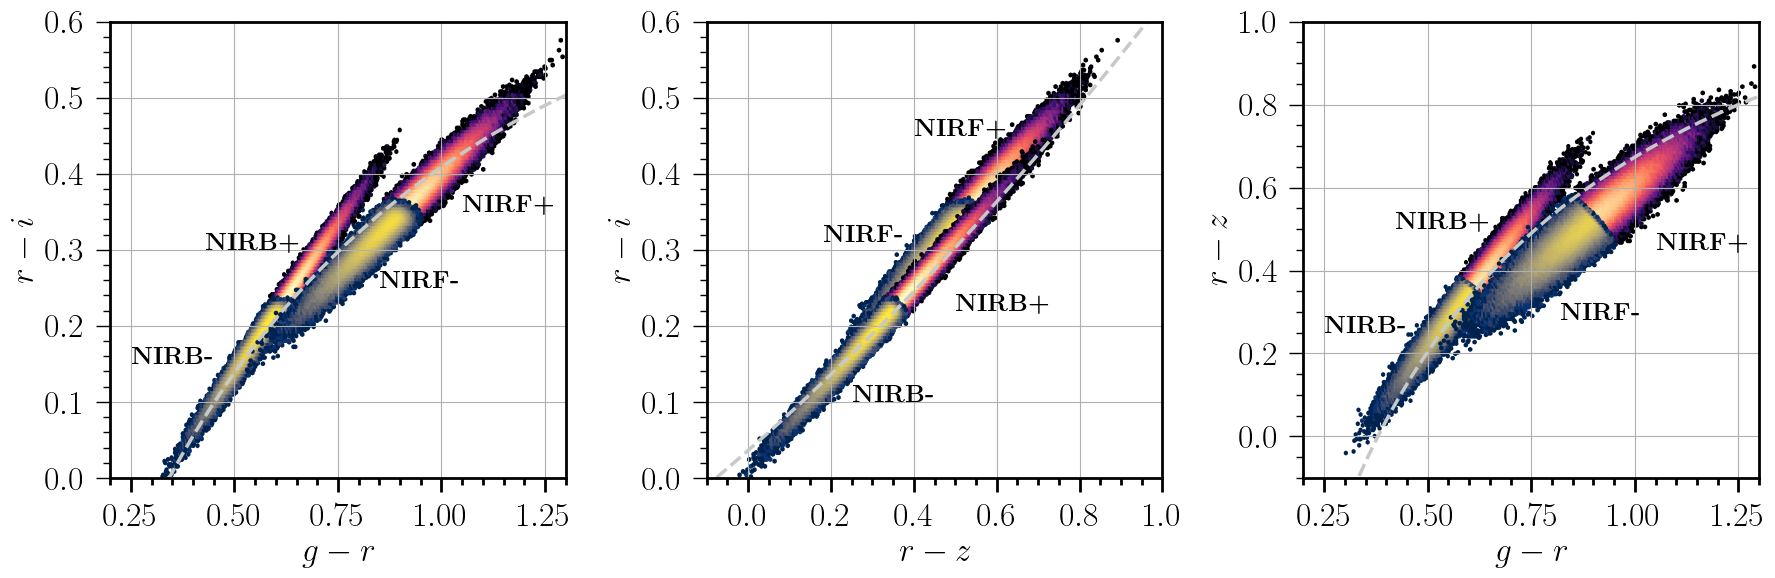

In [ ]:
s = gmm.sampleComponent(500000, 0)

g = gmm.sampleComponent(500000, 1)

fig,ax = pl.subplots(1,3,)


#ax[0].get_shared_y_axes().join(ax[0], ax[2])
#ax[2].get_shared_x_axes().join(ax[2], ax[0])

eigen_nirb = np.linalg.eig(gmm.cov_best[0])[1][:,0]
eigen_nirf = np.linalg.eig(gmm.cov_best[1])[1][:,0]

decomp_nirb = eigendecompose(s, eigen_nirb, gmm.mean_best[0]) #this determines the sign of the correct eigencomponent, as defined in the paper

decomp_nirf = eigendecompose(g, eigen_nirf, gmm.mean_best[1])

im = ax[0].hexbin(s[decomp_nirb<0,0], s[decomp_nirb<0,1], bins='log', cmap='magma',mincnt=1, alpha=1, vmax=1e3, )
ax[0].hexbin(s[decomp_nirb>0,0], s[decomp_nirb>0,1], bins='log', cmap='cividis',mincnt=1, alpha=1, vmax=1e3, )

ax[0].hexbin(g[decomp_nirf<0,0], g[decomp_nirf<0,1], bins='log', cmap='magma',mincnt=1, alpha=1, vmax=1e3, )
ax[0].hexbin(g[decomp_nirf>0,0], g[decomp_nirf>0,1], bins='log', cmap='cividis',mincnt=1, alpha=1, vmax=1e3, )

ax[0].plot(gr,ri, '--', alpha=1, color='xkcd:silver', lw=2.5 )



ax[1].hexbin(g[decomp_nirf<0,2], g[decomp_nirf<0,1], bins='log', cmap='magma', mincnt=1, vmax=1e3)
ax[1].hexbin(g[decomp_nirf>0,2], g[decomp_nirf>0,1], bins='log', cmap='cividis',mincnt=1, alpha=1, vmax=1e3)

ax[1].hexbin(s[decomp_nirb<0,2], s[decomp_nirb<0,1], bins='log', cmap='magma', mincnt=1, vmax=1e3)
ax[1].hexbin(s[decomp_nirb>0,2], s[decomp_nirb>0,1], bins='log', cmap='cividis',mincnt=1, alpha=1, vmax=1e3)


ax[1].plot(rz,ri, '--', alpha=1, color='xkcd:silver',lw=2.5)


ax[2].hexbin(s[decomp_nirb<0,0], s[decomp_nirb<0,2], bins='log', cmap='magma',mincnt=1, vmax=1e3)
ax[2].hexbin(s[decomp_nirb>0,0], s[decomp_nirb>0,2], bins='log', cmap='cividis',mincnt=1, vmax=1e3)

ax[2].hexbin(g[decomp_nirf<0,0], g[decomp_nirf<0,2], bins='log', cmap='magma',mincnt=1, vmax=1e3)
ax[2].hexbin(g[decomp_nirf>0,0], g[decomp_nirf>0,2], bins='log', cmap='cividis',mincnt=1, vmax=1e3)


ax[2].plot(gr,rz, '--', alpha=1, color='xkcd:silver',lw=2.5)



ax[1].set_ylabel(r'$r-i$')
ax[1].set_xlabel(r'$r-z$')
ax[2].set_xlabel(r'$g-r$')
ax[2].set_ylabel(r'$r-z$')

ax[0].set_ylabel(r'$r-i$')
ax[0].set_xlabel(r'$g-r$')
ax[0].grid()
ax[2].grid()

ax[1].grid()


ax[0].set_xlim(0.2, 1.3)
ax[0].set_ylim(0,0.6)

ax[2].set_ylim(-0.1, 1)
ax[2].set_xlim(0.2, 1.3)

ax[1].set_ylim(0,0.6)
ax[1].set_xlim(-0.1,1)


ax[0].set_xticks([0.25, 0.5, 0.75, 1, 1.25])
ax[2].set_xticks([0.25, 0.5, 0.75, 1, 1.25])

ax[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
ax[1].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

ax[1].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

fig.set_size_inches(18,6)

ax[0].text(0.25, 0.15, r'$\textbf{NIRB-}$', fontsize=18)
ax[1].text(0.25, 0.1, r'$\textbf{NIRB-}$', fontsize=18)
ax[2].text(0.25, 0.25, r'$\textbf{NIRB-}$', fontsize=18)

ax[0].text(0.43, 0.3, r'$\textbf{NIRB+}$', fontsize=18)
ax[1].text(0.5, 0.22, r'$\textbf{NIRB+}$', fontsize=18)
ax[2].text(0.42, 0.5, r'$\textbf{NIRB+}$', fontsize=18)

ax[0].text(0.85, 0.25, r'$\textbf{NIRF-}$', fontsize=18)
ax[1].text(0.18, 0.31, r'$\textbf{NIRF-}$', fontsize=18)
ax[2].text(0.82, 0.28, r'$\textbf{NIRF-}$', fontsize=18)

ax[0].text(1.05, 0.35, r'$\textbf{NIRF+}$', fontsize=18)
ax[1].text(0.4, 0.45, r'$\textbf{NIRF+}$', fontsize=18)
ax[2].text(1.05, 0.45, r'$\textbf{NIRF+}$', fontsize=18)



pl.tight_layout()
pl.show()